<a href="https://colab.research.google.com/github/nish128/Customer-Segmentation/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

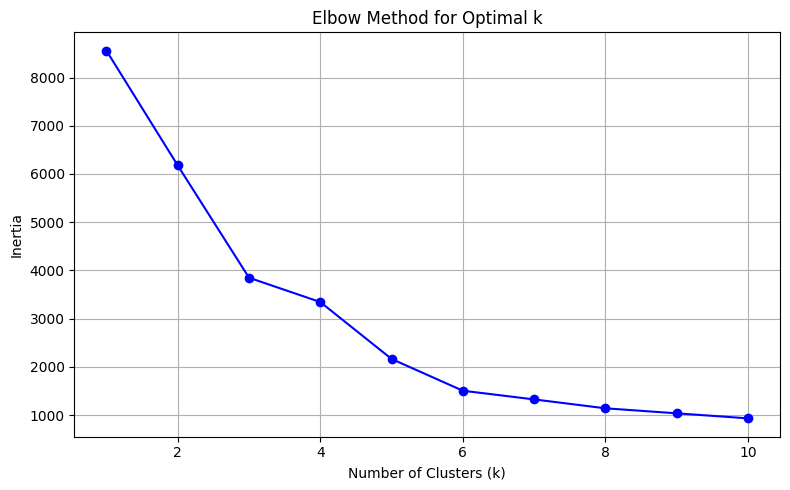

Clustering complete. File saved as RFM_Clustered.csv


In [ ]:
#Import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Load RFM data
rfm_df = pd.read_csv("RFM_Table.csv")

#Step 1: Scale the RFM features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

#Step 2: Elbow Method to determine optimal clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

#Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()

#Step 3: Apply KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

#Step 4: Save final RFM with clusters
rfm_df.to_csv("RFM_Clustered.csv", index=False)

print("Clustering complete. File saved as RFM_Clustered.csv")
